In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep = ',',header = 0) 

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Bivariate analysis: Age vs. Stroke

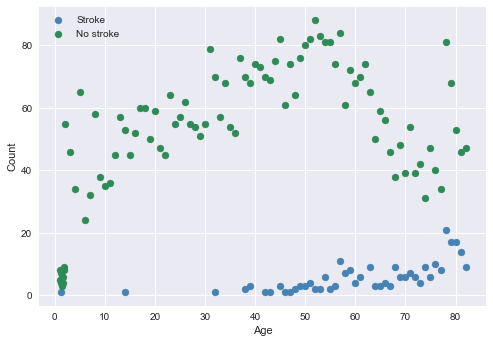

In [4]:
# Clean up age column, get rid of outliers
for index, row in data.iterrows():
    if row['age'] < 1.00:
        data.drop(index, inplace=True)
        
plt.style.use('seaborn')
stroke = data.loc[data['stroke'] == 1]
no_stroke = data.loc[data['stroke'] == 0]

stroke_age = pd.DataFrame(stroke.age.value_counts())
stroke_age = stroke_age.rename(columns={'age': 'count'})
no_stroke_age = pd.DataFrame(no_stroke.age.value_counts())
no_stroke_age = no_stroke_age.rename(columns={'age': 'count'})

plt.scatter(stroke_age.index, stroke_age['count'], color = 'steelblue')

plt.scatter(no_stroke_age.index, no_stroke_age['count'], color = 'seagreen')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Stroke', 'No stroke'])
plt.show()

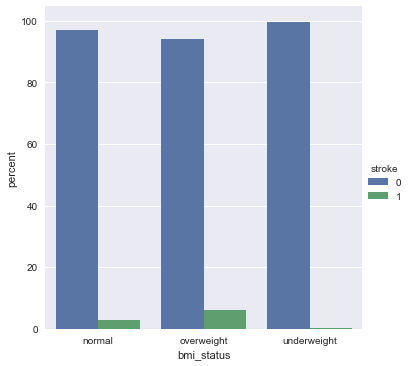

In [5]:
#replace null data with median
data["bmi"].fillna(data["bmi"].median(), inplace=True)

#add bmi status column (changing the bmi value to underweight,normal and overweight)
criteria = [data['bmi'].between(0, 18.5), data['bmi'].between(18.6, 24.9), data['bmi'].between(25, 100)]
values = ['underweight', 'normal', 'overweight']

data['bmi_status'] = np.select(criteria, values, 0)
data

x,y = 'bmi_status', 'stroke'

(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

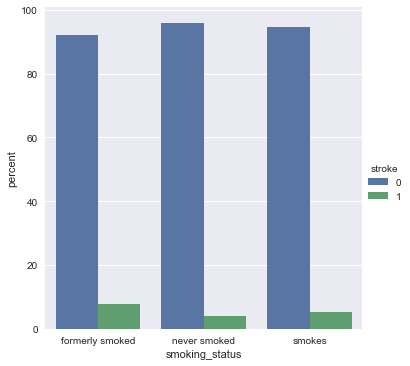

In [9]:
#replace the unknown in smoking status to it median values
data["smoking_status"].replace("Unknown", data["smoking_status"].mode().values[0], inplace=True)

#normalized plot for smoking & stroke
x,y = 'smoking_status', 'stroke'
(data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.show()

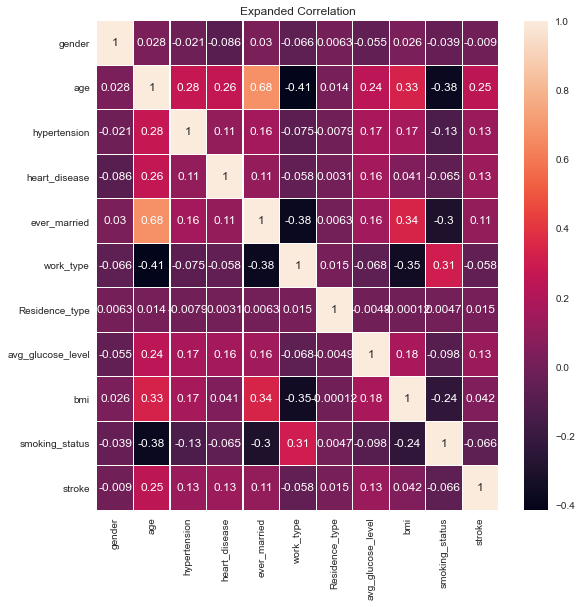

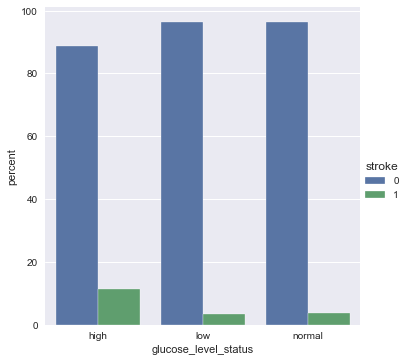

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

data = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep = ',',header = 0)
data.drop('id', inplace=True, axis=1)

#Change other columns to numeric data
Another_data = data.copy()
Another_data['gender'] = np.where((Another_data['gender'] == "Female"), 1, 0)
Another_data['ever_married'] = np.where((Another_data['ever_married'] == "Yes"), 1, 0)
Another_data['Residence_type'] = np.where((Another_data['Residence_type'] == "Urban"), 1, 0)
Another_data['work_type'] = Another_data['work_type'].factorize()[0]
Another_data['smoking_status'] = Another_data['smoking_status'].factorize()[0]
#Another_data.head(20)
plt.figure(figsize=(9,9))
sns.heatmap(Another_data.corr(),annot=True, linewidths=0.1)
plt.title("Expanded Correlation")
plt.show()

#add criteria_glucose column (changing the glucose value to underweight,normal and overweight)
criteria_glucose = [data['avg_glucose_level'].between(0, 70), data['avg_glucose_level'].between(70.0001, 140), data['avg_glucose_level'].between(140.0001, 3000)]
values = ['low', 'normal', 'high']
data['glucose_level_status'] = np.select(criteria_glucose, values, 0)

#normalized plot for bmi and stroke
x,y = 'glucose_level_status', 'stroke'

data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
plt.show()

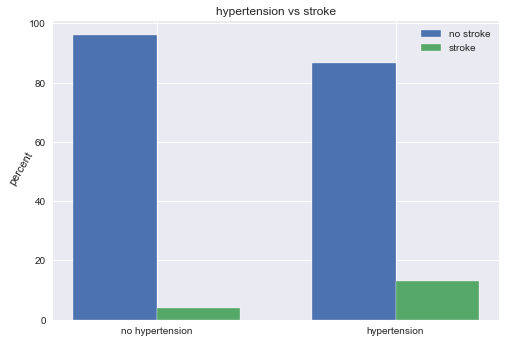

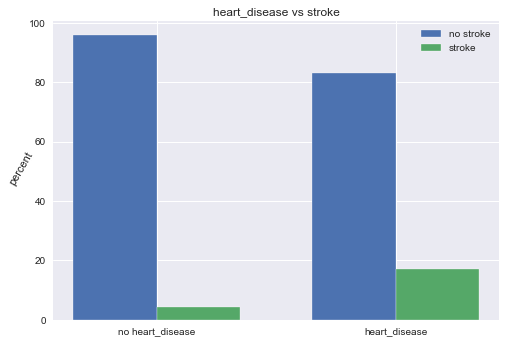

/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


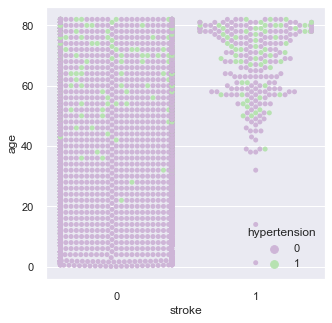

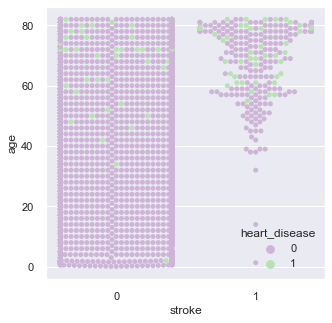

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def bivariate(df):
    """
    visualization of Hypertension and heart disease
    plot out the relation between hypertension and stroke, heart disease and stroke
    :param df: the dataset of stroke
    """
    # hypertension vs stroke
    plt.figure()
    grp = df.groupby(['stroke','hypertension']).count()
    a = list(grp.loc[(0,0):(0,1)].id)
    b = list(grp.loc[(1,0):(1,1)].id)
    plt.style.use('seaborn')
    bar_width = 0.35
    dist_1 = np.array([a[0], b[0]])/(a[0]+b[0]) * 100
    dist_2 = np.array([a[1], b[1]]) / (a[1] + b[1]) * 100
    a = [dist_1[0],dist_2[0]]
    b = [dist_1[1],dist_2[1]]
    index = np.arange(2)
    rects1 = plt.bar(index, a, bar_width, label='no stroke')
    rects2 = plt.bar(index + bar_width, b, bar_width, label='stroke')
    plt.xticks([bar_width/2,bar_width/2+1], ('no hypertension', 'hypertension'))
    plt.ylabel('percent', rotation=60)
    plt.title('hypertension vs stroke')
    plt.legend()
    # heart disease vs stroke
    plt.figure()
    grp = df.groupby(['stroke','heart_disease']).count()
    a = list(grp.loc[(0,0):(0,1)].id)
    b = list(grp.loc[(1,0):(1,1)].id)
    dist_1 = np.array([a[0], b[0]]) / (a[0] + b[0]) * 100
    dist_2 = np.array([a[1], b[1]]) / (a[1] + b[1]) * 100
    a = [dist_1[0], dist_2[0]]
    b = [dist_1[1], dist_2[1]]
    index = np.arange(2)
    rects1 = plt.bar(index, a, bar_width, label='no stroke')
    rects2 = plt.bar(index + bar_width, b, bar_width, label='stroke')
    plt.xticks([bar_width / 2, bar_width / 2 + 1], ('no heart_disease', 'heart_disease'))
    plt.ylabel('percent', rotation=60)
    plt.title('heart_disease vs stroke')
    plt.legend()
    plt.show()


def age_vs_health(df):
    """
    find the relationship between age, hypertension and heart disease
    :param df: the dataset of stroke
    """
    plt.figure(figsize=(5, 5))
    sns.set_theme(style="darkgrid")
    sns.swarmplot(x="stroke", y="age", hue="hypertension", data=df, palette="PRGn")
    plt.figure(figsize=(5, 5))
    sns.set_theme(style="darkgrid")
    sns.swarmplot(x="stroke", y="age", hue="heart_disease", data=df, palette="PRGn")
    plt.show()


if __name__ == '__main__':
    df = pd.read_csv('healthcare-dataset-stroke-data.csv')
    bivariate(df)
    age_vs_health(df)